<a href="https://colab.research.google.com/github/calosos/py_resumenes_codigos/blob/main/Trading_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1.    Installation of libraries

In [1]:
!pip install fxcmpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 52 kB 1.1 MB/s 
     |████████████████████████████████| 54 kB 2.6 MB/s 
     |████████████████████████████████| 52 kB 1.3 MB/s 


In [2]:
!pip install fxcmpy --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 70 kB 3.5 MB/s 


In [4]:
!pip install --upgrade mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
!pip install pyti

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# 2. Librarys

In [6]:
import time
import numpy as np
import pandas as pd
import datetime as dt
from pylab import mpl,plt
import fxcmpy

In [7]:
import mplfinance as mpf

In [8]:
from fxcmpy import  fxcmpy_tick_data_reader as tdr

In [9]:
plt.style.use('seaborn')
mpl.rcParams['font.family']='serif'
%matplotlib inline

In [120]:
from scipy import stats

1156 | EUR/USD | 2022-06-01 05:35:34.950000 | 1.07071, 1.07085
1925 | XAU/USD | 2022-06-01 05:35:34.806000 | 1830.74000, 1831.07000
1157 | EUR/USD | 2022-06-01 05:35:35.605000 | 1.07069, 1.07083
1926 | XAU/USD | 2022-06-01 05:35:35.297000 | 1830.78000, 1831.11000


#3. Broker connection

D161558089 usuario 
kM3tl password

In [10]:
TOKEN = '71c091611d0281db76d7d9595aa08f8ad6ee1dce'

In [11]:
con = fxcmpy.fxcmpy(access_token='8030bef1dcbafa80e75ef40522559c442fa07d41', log_level='error')

#4. Instruments DataFrame 

In [12]:
instruments = con.get_instruments()
print(instruments)

['EUR/USD', 'USD/JPY', 'GBP/USD', 'USD/CHF', 'EUR/CHF', 'AUD/USD', 'USD/CAD', 'NZD/USD', 'EUR/GBP', 'EUR/JPY', 'GBP/JPY', 'CHF/JPY', 'GBP/CHF', 'EUR/AUD', 'EUR/CAD', 'AUD/CAD', 'AUD/JPY', 'CAD/JPY', 'NZD/JPY', 'GBP/CAD', 'GBP/NZD', 'GBP/AUD', 'AUD/NZD', 'USD/SEK', 'EUR/SEK', 'EUR/NOK', 'USD/NOK', 'USD/MXN', 'AUD/CHF', 'EUR/NZD', 'USD/ZAR', 'USD/HKD', 'ZAR/JPY', 'USD/TRY', 'EUR/TRY', 'NZD/CHF', 'CAD/CHF', 'NZD/CAD', 'TRY/JPY', 'USD/CNH', 'AUS200', 'ESP35', 'FRA40', 'GER30', 'HKG33', 'JPN225', 'NAS100', 'SPX500', 'UK100', 'US30', 'Copper', 'CHN50', 'EUSTX50', 'VOLX', 'USDOLLAR', 'US2000', 'INDIA50', 'USOil', 'UKOil', 'SOYF', 'NGAS', 'USOilSpot', 'UKOilSpot', 'WHEATF', 'CORNF', 'Bund', '5USNote', '10USNote', '2USNote', 'Bobl', 'Schatz', 'FED30D', 'EURIBOR3M', 'EURDLR3M', 'SONIA3M', 'IBHY', 'XAU/USD', 'XAG/USD', 'EMBasket', 'JPYBasket', 'BTC/USD', 'BCH/USD', 'ETH/USD', 'LTC/USD', 'CryptoMajor', 'EOS/USD', 'XLM/USD', 'ADA/USD', 'DOGE/USD', 'DOT/USD', 'BTC/EUR', 'BTC/AUD', 'BTC/GBP', 'ETH/EU

In [13]:
df_instruments = pd.DataFrame(instruments, columns=['Instruments'])
df_instruments.size
df_instruments.head()

,Instruments
0,EUR/USD
1,USD/JPY
2,GBP/USD
3,USD/CHF
4,EUR/CHF


In [14]:
df_instruments_na=df_instruments.replace('', np.nan)
df_instruments_na.head()

,Instruments
0,EUR/USD
1,USD/JPY
2,GBP/USD
3,USD/CHF
4,EUR/CHF


In [15]:
df_instruments_dropna=df_instruments_na.dropna()
df_instruments_dropna.head()

,Instruments
0,EUR/USD
1,USD/JPY
2,GBP/USD
3,USD/CHF
4,EUR/CHF


In [16]:
df_instruments_clean=df_instruments_dropna.reset_index(inplace=False, drop=True)
df_instruments_clean

,Instruments
0,EUR/USD
1,USD/JPY
2,GBP/USD
3,USD/CHF
4,EUR/CHF
...,...
314,SNAP.us
315,SNOW.us
316,SPCE.us
317,XPEV.us


#5.Lista de Instrumentos 

In [17]:
df_instruments_clean

,Instruments
0,EUR/USD
1,USD/JPY
2,GBP/USD
3,USD/CHF
4,EUR/CHF
...,...
314,SNAP.us
315,SNOW.us
316,SPCE.us
317,XPEV.us


#6.Parametros para obtener datos



Elegir Instrumento

In [189]:
#EUR/USD=0
#Oro  =76
#BTC/USD=80
#Amazon=138
num_instrument=76
instrument = df_instruments_clean.at[num_instrument, 'Instruments']
instrument

'XAU/USD'

Elegir  Temporalidad

In [190]:
# # Available periods : 'm1', 'm5', 'm15', 'm30', 'H1', 'H2', 'H3', 'H4', 'H6', 'H8','D1', 'W1', or 'M1'.
timeframe = "m5" 

Elegir número de peridos

In [208]:
numberofcandles = 100

In [209]:
data_candles = con.get_candles(instrument,period=timeframe, number=numberofcandles)
data_candles.tail()

119 | XAU/USD | 2022-06-01 07:37:30.028000 | 1831.93000, 1832.24000


,bidopen,bidclose,bidhigh,bidlow,askopen,askclose,askhigh,asklow,tickqty
date,,,,,,,,,
2022-06-01 07:15:00,1835.61,1835.11,1835.61,1834.55,1835.94,1835.43,1836.03,1834.85,1306
2022-06-01 07:20:00,1835.08,1836.06,1836.23,1834.16,1835.39,1836.38,1836.54,1834.48,1412
2022-06-01 07:25:00,1836.02,1835.34,1836.22,1835.11,1836.33,1835.66,1836.54,1835.41,904
2022-06-01 07:30:00,1835.26,1833.31,1836.18,1833.30,1835.58,1833.61,1836.51,1833.61,1158
2022-06-01 07:35:00,1833.30,1831.94,1833.31,1831.54,1833.61,1832.25,1833.62,1831.85,853


##6.1Limpieza de Tabla 

In [210]:
candles_2 = data_candles[data_candles.columns[:4]] 
candles_bid=candles_2.rename(columns={"bidopen": "Open", "bidclose": "Close",'bidhigh':'High','bidlow':'Low'})
candles_bid.tail()
candles_bid.shape

121 | XAU/USD | 2022-06-01 07:37:31.031000 | 1831.92000, 1832.23000


(100, 4)

In [211]:
candles_2 = data_candles[data_candles.columns[4:8]] 
candles_ask=candles_2.rename(columns={"askopen": "Open", "askclose": "Close",'askhigh':'High','asklow':'Low'})
candles_ask.tail()
candles_ask.shape

(100, 4)

122 | XAU/USD | 2022-06-01 07:37:31.828000 | 1831.92000, 1832.23000


#7. Estimados de locación

<Mpf_Figure size 2000x1400 with 0 Axes>

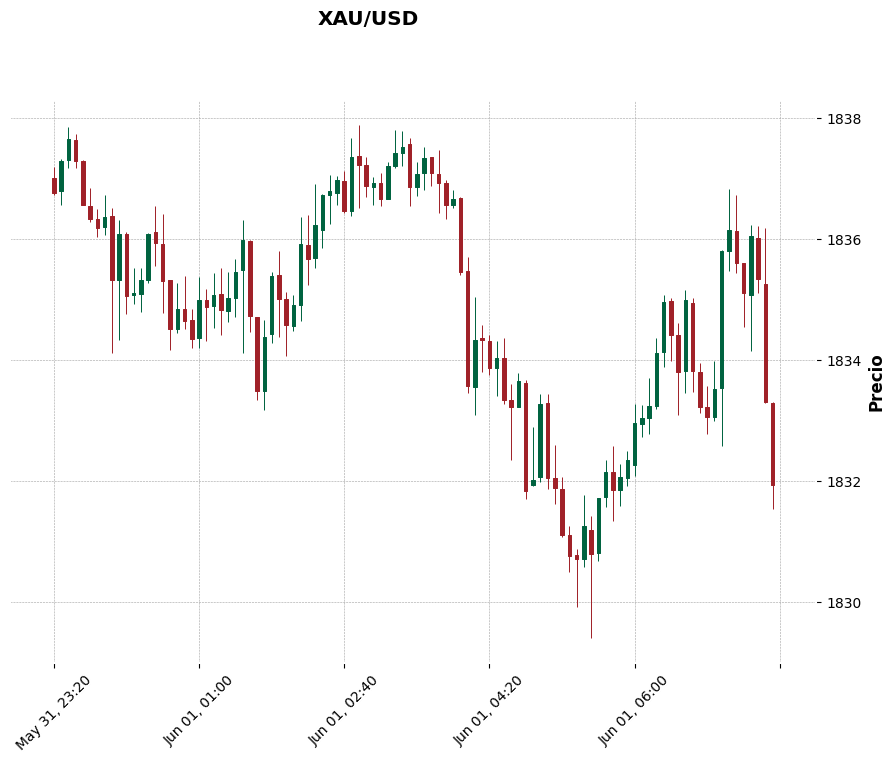

123 | XAU/USD | 2022-06-01 07:37:33.420000 | 1831.89000, 1832.20000

In [212]:
mpf.figure(figsize=(20, 14))
mpf.plot(candles_bid, type='candle', style='charles', title= instrument, ylabel= 'Precio', figscale=1.4);

Calcular el precio promedio de cada periodo

In [213]:
candles_bid['Mid']=candles_bid[['Open','Close']].mean(axis=1)
candles_bid.head(3)

,Open,Close,High,Low,Mid
date,,,,,
2022-05-31 23:20:00,1837.01,1836.77,1837.19,1836.73,1836.890
2022-05-31 23:25:00,1836.80,1837.29,1837.33,1836.57,1837.045
2022-05-31 23:30:00,1837.30,1837.66,1837.85,1837.17,1837.480


126 | XAU/USD | 2022-06-01 07:37:35.471000 | 1831.86000, 1832.16000


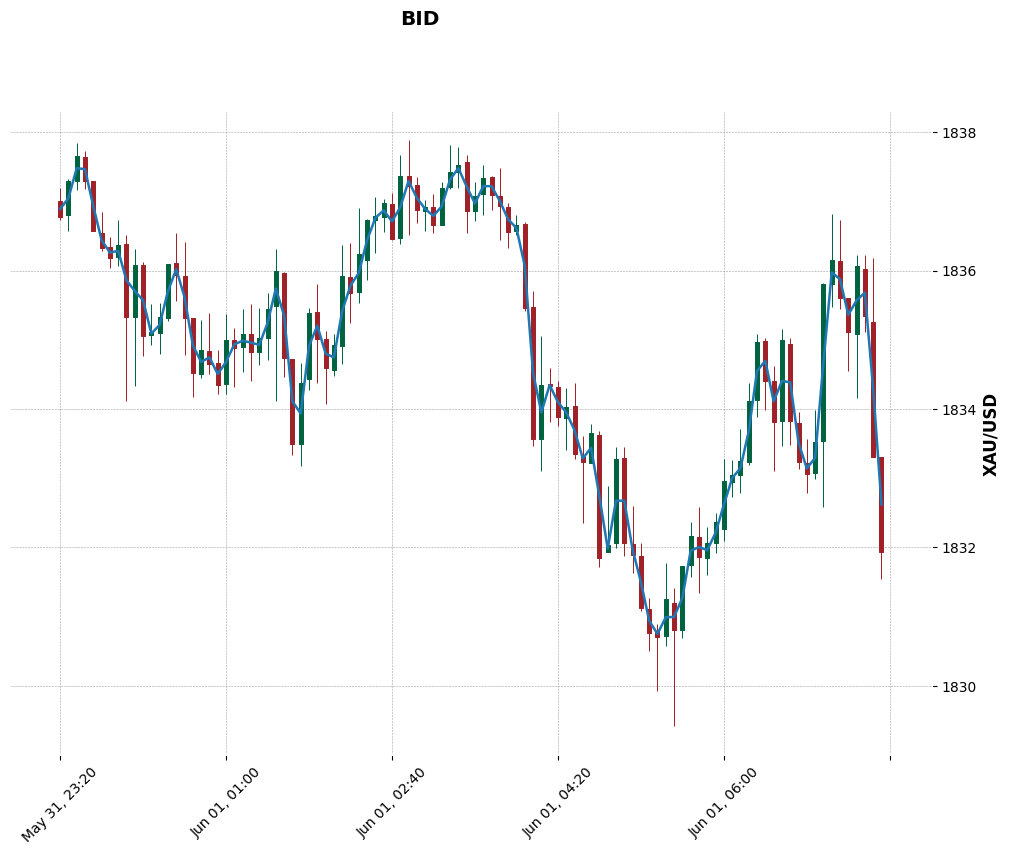

In [214]:
apdict = mpf.make_addplot(candles_bid['Mid'])
mpf.plot(candles_bid, type='candle', style='charles', title= 'BID', ylabel= instrument, addplot=apdict,figscale=1.6);

#mpf.plot(candles_bid,volume=True,addplot=apdict)

In [215]:
candles_bid.tail(1)

,Open,Close,High,Low,Mid
date,,,,,
2022-06-01 07:35:00,1833.3,1831.94,1833.31,1831.54,1832.62


##7.1Conectar para adquir datos

In [216]:
def output(data, dataframe):
  print('%3d | %s | %s | %6.5f, %6.5f'
    % (len(dataframe), data['Symbol'],
      pd.to_datetime(int(data['Updated']), unit='ms'),
      data['Rates'][0], data['Rates'][1]))

In [217]:
con.subscribe_market_data(instrument, (output,))

130 | XAU/USD | 2022-06-01 07:37:39.407000 | 1832.00000, 1832.31000


Usar solo cúando se vaya a desconectar de los  datos

In [218]:
#con.unsubscribe_market_data(instrument)

##Promedio 

In [219]:
con.get_last_price(instrument)

Bid     1831.94
Ask     1832.25
High    1829.42
Low     1838.85
Name: 2022-06-01 07:37:42.548000, dtype: float64

In [220]:
promedio =candles_bid['Mid'].mean()
print(f'El promedio es: {promedio}')

137 | XAU/USD | 2022-06-01 07:37:43.713000 | 1831.95000, 1832.26000
El promedio es: 1834.8508


##Mediana

In [223]:
mediana =candles_bid['Mid'].median()
print(f'La mediana es: {mediana}')

La mediana es: 1834.9475


##Media Truncada

In [224]:
media_truncada = stats.trim_mean(candles_bid['Mid'], 0.1)   
print(f'La media truncada: {media_truncada}')

184 | XAU/USD | 2022-06-01 07:38:14.490000 | 1831.48000, 1831.79000
La media truncada: 1834.9748124999999


261 | XAU/USD | 2022-06-01 07:39:13.187000 | 1832.60000, 1832.90000


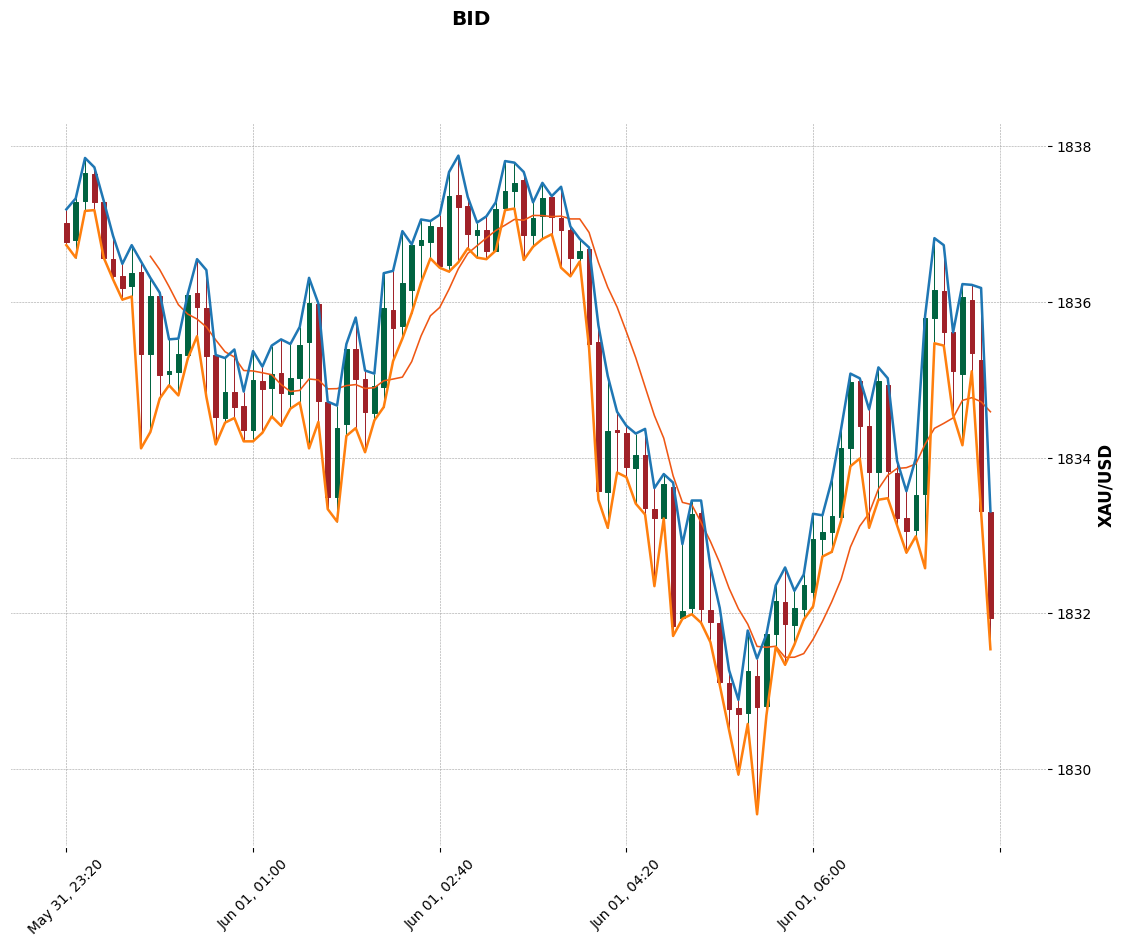

262 | XAU/USD | 2022-06-01 07:39:13.900000 | 1832.63000, 1832.94000

In [228]:
tcdf = candles_bid[['High','Low']]  # DataFrame with two columns
apd  = mpf.make_addplot(tcdf)
mpf.plot(candles_bid, type='candle', style='charles', title= 'BID', ylabel= instrument, addplot=apd, mav=10, figscale=1.8) ;

## Valores Atípicos

##Desviación Estándar

Mean

Moving avarange


DAY

In [27]:
data['SMA1']= data['MidClose'].rolling(30).mean()
data['SMA2']= data['MidClose'].rolling(100).mean()

NameError: ignored

#Real-Time SMA Crossover Strategy

https://docs.python.org/es/3/library/datetime.html
https://www.programiz.com/python-programming/datetime/current-datetime 
https://pandas.pydata.org/docs/reference/api
https://github.com/matplotlib/mplfinance/blob/master/examples/panels.ipynb
https://github.com/fxcm/RestAPI/blob/master/Europe-Algo-Meetup/EMA%20Crossover%20Strategy%20and%20Backtesting.ipynb
https://github.com/fxcm/RestAPI/blob/master/Europe-Algo-Meetup/Real-Time%20SMA%20Crossover%20Strategy.ipynb/
